In [1]:
import os
import pandas as pd
import numpy as np
import re
import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook

## All 50 speakers, not just the 41 question IPUs.  This is just testing coding theory.  If it works, redo gathering the data - add more data (get IPUs from just the questions).
- Will need to get legendre coefficients from the pitch measurements of all of the question speakers I'm using
- Get pitch from openSmile, put that into Python, get the 6-degree Legendre polynomial thing to run, and then pick up here.

In [2]:
#### gets the legendre polynomials for each speaker's individual IPUs (all 50, not just questions)
### will need to fix and clean this data, but for now, see if I can build what I'm trying to build

def getLegendre():
    interlist = []
    all_ipu_coefs = []
    path = "c:/Python27/qp2_py/legendre_polynomials/legendre/"
    item = "ipu_speaker"
    all_ipu_files = os.listdir(path)
    for i in range(len(all_ipu_files)):
        fname = path+item+str(i)+".txt"      
        with open(fname) as infile:
            text = infile.read()
            regexp = r'-?\d+\.\d+'
            linexp = re.compile(regexp)
            strnum = linexp.findall(text)
            data = np.array(strnum).astype(float)
            data = np.array(strnum).astype(float).reshape(-1,6)
            all_ipu_coefs.append(data)
        
   
    return all_ipu_coefs


all_ipu_data = getLegendre()

In [3]:
print(len(all_ipu_data))

50


In [4]:
all_ipu_coefs = []
inter = []
for item in all_ipu_data:
    for leg in item:
        five_degree = list(leg)
        inter.append(five_degree)
    all_ipu_coefs.append(inter)
    inter = []

In [5]:
print (all_ipu_coefs)[0]

[[[134.62287670000001, 50.559266979999997, -74.922264999999996, -31.83351386, -96.692665259999998, -35.27829285], [110.49352292, 20.073714949999999, -52.201617130000002, -7.1509720799999998, -57.988108939999996, 48.884468089999999], [62.280952310000004, -2.6146652800000001, -106.62518206, 0.20312389, 40.923300269999999, 8.6019440100000004], [72.911107189999996, -16.548046150000001, -47.768042989999998, 27.462234800000001, -5.8238106500000004, 50.28390864], [71.929552180000002, -21.257097479999999, -47.597274759999998, 0.61060844999999997, -41.56645477, 20.855412749999999], [81.263026199999999, 2.3064941000000001, -26.917937420000001, 7.3635058000000004, -35.475795089999998, 3.3023206799999998], [100.78373861999999, 51.529789110000003, 13.76601541, -50.464502070000002, 57.452038270000003, -44.77558758], [81.646349580000006, 15.722287590000001, -3.1713694399999999, -63.019293429999998, 45.26611724, -5.0573707900000002], [119.64052248, -9.4491592499999992, -53.246780459999997, -10.3790646

TypeError: 'NoneType' object is not subscriptable

Calculating probability distributions across the Legendre polynomial coefficients:
for each coefficient c_i:
  find the mean and standard deviation of all c_ij for all contours j in group d in training data 
  use as parameters for gaussian distribution g_d_i

for each contour k in unseen data:
  for each group d:
    for each coefficient i:
      find the posterior probability of coefficient k_i given distribution g_d_i
    sum the log probabilities
    this is the posterior probability of contour k coming from group d
  assign the group d that gives the highest probability.

In [26]:
print (all_ipu_coefs[0][900])

IndexError: list index out of range

In [47]:

### this is wrong, delete it when you know for sure that it is
summ = 0
count = 0

for coefs in all_ipu_coefs[0][0]:
    print (coefs)
    summ = coefs+ summ
    count = count +1
    
print (summ, count)

mean = summ/count
print (mean)
std = np.std(all_ipu_coefs[0][0])
print (std)

134.6228767
50.55926698
-74.922265
-31.83351386
-96.69266526
-35.27829285
-53.54459329 6
-8.92409888167
78.9751743929


### for each coefficient c_i, find the mean and std of all c_ij for all contours j in group d in training data.
Build up training data from this, see if this is what Rivka meant.  

In [5]:
## outputs a list of lists - speakers, and the means and stds associated with their contour legendre coefficients.
degree = 5

speaker_ipu_coefs = []

means = []
standard_devs = []
speaker_means = []
speaker_std = []
for item in all_ipu_coefs:
    for i in range(len(item)):
        ipu = item[i]
        #print (ipu)
        summ = sum(ipu)
        length = len(ipu)
        mean = summ / length
        #print (mean)
        means.append(mean)
        std = np.std(ipu)
        standard_devs.append(std)
    speaker_means.append(means)
    speaker_std.append(standard_devs)
    means = []
    standard_devs = []
    
    
#print (speaker_means)
#print (speaker_std)


In [6]:
### Get general means and general std -> this could be for prototypical contours (for YN questions, wh questions)
for mean in speaker_means:
    all_means = (sum(mean)/len(speaker_means))
for std in speaker_std:
    all_std = (sum(std)/len(speaker_std))
print (all_means, all_std)

3.50795227883 94.3826790919


In [7]:
degree = 5

speaker_ipu_coefs = []

means = []
standard_devs = []
speaker_means = []
speaker_std = []
for item in all_ipu_coefs:
    for i in range(len(item)):
        ipu = item[i]
        #print (ipu)
        summ = sum(ipu)
        length = len(ipu)
        mean = summ / length
        #print (mean)
        means.append(mean)
        std = np.std(ipu)
        standard_devs.append(std)
    speaker_means.append(means)
    speaker_std.append(standard_devs)
    #means = []
    #standard_devs = []

print (len(means))
print (len(standard_devs))

12119
12119


In [104]:
means_list = []
inter = []
for item in range(len(all_ipu_coefs)):
    for i in all_ipu_coefs[i][i]
    inter.append(item)
    means_list.append(mean)

std_list = []
for item in std:
    std_list.append(item)
print(len(means_list), len(std_list))

0 98


In [106]:
## NO NO NO NO NO NO BAD NO NO NO NO 

general_means = []
degree = 5
inter = []
for item in all_ipu_coefs:
    for i in range(len(item)):
        ipu = item[i]
        ipu_coefs = [ipu[i][j] for j in range(degree)]
        inter.append(ipu_coefs)
        mean = sum(inter)/len(inter)
    general_means.append(inter)
    inter = []
print (len(general_means))

IndexError: invalid index to scalar variable.

In [67]:
### add to pandas dataframe
## well this is very bad.  Fix this.

features = pd.DataFrame(speaker_means, speaker_std, columns=["SpkrMeans", "SpkrSTDs"])



AssertionError: 2 columns passed, passed data had 790 columns

In [87]:
print (speaker_means)
print (speaker_std)

[[-8.9240988816666658, 10.351834635000001, 0.46157885666666765, 13.419558473333334, -2.8375422716666656, 5.3069357116666653, 21.381915293333332, 11.897786791666666, 0.96622975666666788, -0.039164544999999627, 17.682214436666669, -0.88361541166666602, 11.918453896666669, -2.3405107766666653, 4.0017008750000009, 31.154462753333334, 16.100633181666669, 2.8473522483333333, -1.4139322866666657, 18.745285978333332, 18.537865808333336, -3.2294247116666663, 15.121651030000001, -3.0439598016666665, 17.78467406, -4.3824603383333338, 20.165124110000004, -7.7824637033333346, 25.429523793333331, 11.196353130000004, 2.7423017200000017, 12.233125288333333, -2.2798236666666662, -1.9556577249999989, 0.042263061666667191, -1.9759244583333342, 16.911152498333333, -1.2672565433333336, 0.035632904999999639, 13.112348758333333, 42.28221605833334, 2.0536987733333336, 15.236272476666668, -8.3927199533333319, -3.3934298916666656, 26.75833751, 0.19510979833333289, 3.652695018333334, 27.633163506666673, -2.01087

#### Calculate a Gaussian distribution, g_d_i, which I think is with all of the data I have so far (using speaker means and stds?)
- In which I try some stastistics that do NOT go well.

In [8]:
import scipy.stats

In [119]:
#DO NOT RUN
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')

In [118]:
#DO NOT RUN
distribution = scipy.stats.norm(speaker_means, speaker_std)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
print(distribution.pdf())

TypeError: pdf() missing 1 required positional argument: 'x'

<IPython.core.display.Javascript object>


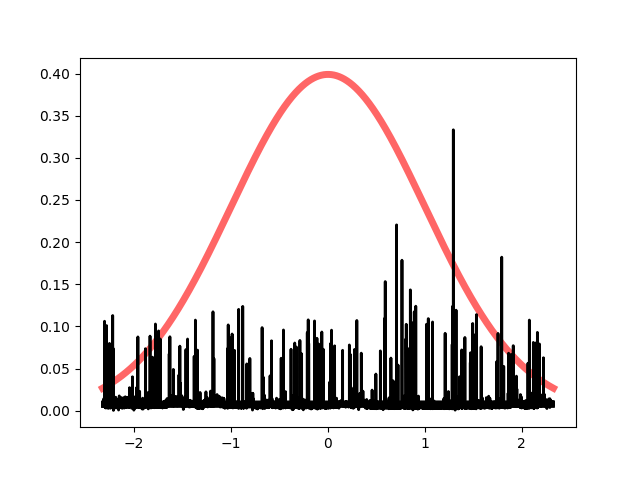

In [16]:
## Example
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [17]:
mean, var, skew, kurt = norm.stats(moments='mvsk')
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 12119)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')

In [123]:
#### this just produces a straight line.  We need all of the distribution points around the curve.

rv = norm(all_means,all_std )
#rv = norm(speaker_means, speaker_std)
ax.plot(x, rv.pdf(x), 'o-', lw=2, label='frozen pdf')

3.50795227883


In [19]:
## this is probably not the way that this should look - not sure how to fix


rv = norm(means, standard_devs) 
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [14]:
for i in range(len(means)):
    rv = rv = norm(means[i], standard_devs[i]) 
    ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

KeyboardInterrupt: 

In [18]:
#Well this didn't work either

testm = means[:10]
tests = standard_devs[:10]

for i in range(len(testm)):
    rv = rv = norm(testm[i], tests[i]) 
    ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [20]:
# Let's try more things that are unlikely to work
from scipy import stats
pts = 12119

a = normal(means, 1, size=pts)
b = normal(standard_devs, 1, size=pts)
x = np.concatenate((a, b))
k2, p = stats.normaltest(x)
alpha = 1e-3
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

NameError: name 'normal' is not defined